## 基于KNN方法的金融数据分析实践

1. 导库

In [19]:
# Step 1: 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## 数据来源
https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information

In [34]:
df = pd.read_csv('financials.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


In [21]:
fetures = ["Price", "Price/Earnings", "Dividend Yield", "Earnings/Share","52 Week Low", "52 Week High", "Market Cap", "EBITDA", "Price/Sales", "Price/Book"]
X = df[fetures]
Y = df['Sector']


In [22]:
X = X.fillna(X.median())

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, weights="distance")
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(weights='distance')

Classification report:
                            precision    recall  f1-score   support

    Consumer Discretionary       0.27      0.35      0.31        17
          Consumer Staples       0.33      0.14      0.20         7
                    Energy       0.75      0.50      0.60         6
                Financials       0.41      0.54      0.47        13
               Health Care       0.75      0.25      0.38        12
               Industrials       0.22      0.31      0.26        13
    Information Technology       0.29      0.43      0.34        14
                 Materials       0.00      0.00      0.00         5
               Real Estate       0.75      0.43      0.55         7
Telecommunication Services       0.00      0.00      0.00         1
                 Utilities       0.38      0.50      0.43         6

                  accuracy                           0.36       101
                 macro avg       0.38      0.31      0.32       101
              weighted 

c:\Users\duckd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\duckd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\duckd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


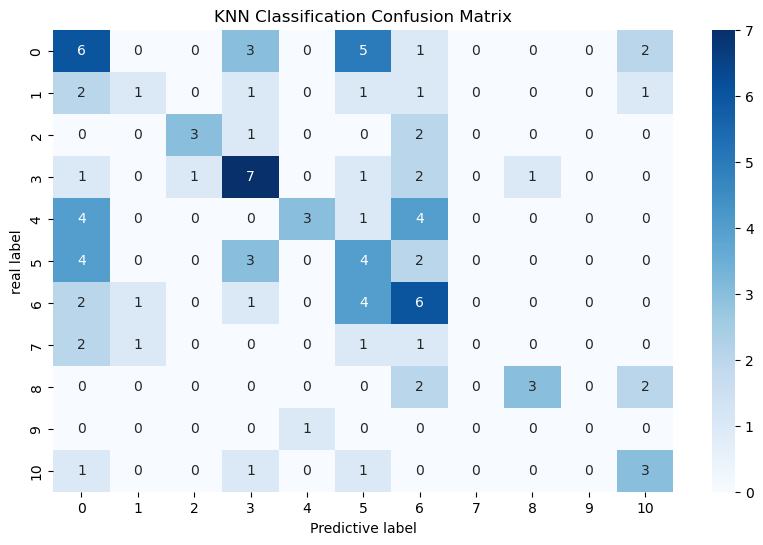

In [33]:
# Step 6: 模型预测与评估
y_pred = knn.predict(X_test_scaled)

print("Classification report:")
print(classification_report(y_test, y_pred))

# 混淆矩阵可视化
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("KNN Classification Confusion Matrix")
plt.xlabel("Predictive label")
plt.ylabel("real label")
plt.show()


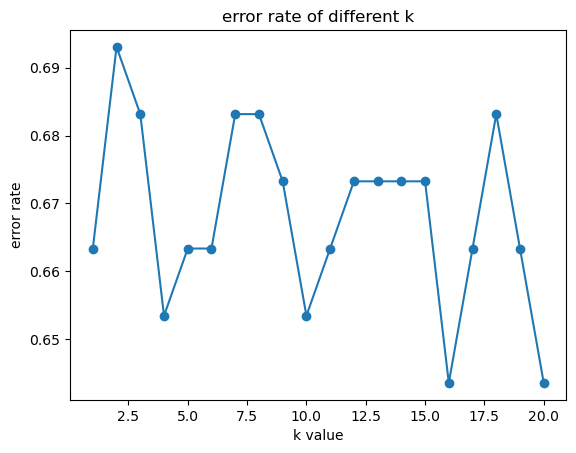

In [32]:
# Step 7: 寻找最优 k
error_rates = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rates.append(np.mean(y_pred != y_test))

plt.plot(k_range, error_rates, marker='o')
plt.xlabel("k value")
plt.ylabel("error rate")
plt.title("error rate of different k")
plt.show()
